In [11]:
"""
REDES NEURONALES DESDE CERO
===========================

Objetivos:
- Comprender conceptos básicos de redes neuronales mediante implementación scratch
- Manejar datos de imágenes (MNIST)
- Implementar forward propagation y backpropagation
- Aplicar funciones de activación y softmax
- Entrenar con mini-batch gradient descent

Sprint: Fundamentos de Deep Learning
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

# Configuración de matplotlib
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

print("="*80)
print("REDES NEURONALES DESDE CERO")
print("Implementación Scratch con Dataset MNIST")
print("="*80)


REDES NEURONALES DESDE CERO
Implementación Scratch con Dataset MNIST


In [2]:
# ============================================================================
# 1. FUNDAMENTOS TEÓRICOS DE REDES NEURONALES
# ============================================================================

print("📚 1. FUNDAMENTOS TEÓRICOS")
print("="*30)

print("""
🧠 REDES NEURONALES ARTIFICIALES:
─────────────────────────────────

📊 CONCEPTO CENTRAL:
   • Inspiradas en el cerebro humano
   • Neuronas artificiales interconectadas en capas
   • Aprenden patrones complejos mediante ejemplos
   • Aproximadores universales de funciones

🏗️ ARQUITECTURA BÁSICA:
   • Capa de entrada: Recibe datos (784 neuronas para MNIST 28×28)
   • Capas ocultas: Procesan y transforman información
   • Capa de salida: Produce predicciones (10 neuronas para dígitos 0-9)

🔗 NEURONA ARTIFICIAL:
   • Entradas ponderadas: Σᵢ(wᵢ × xᵢ) + b
   • Función de activación: f(z) donde z = Σᵢ(wᵢ × xᵢ) + b
   • Salida: Pasa a siguiente capa o es predicción final

📈 FUNCIONES DE ACTIVACIÓN:
   
   🔸 SIGMOID: σ(z) = 1/(1 + e^(-z))
      • Rango: (0, 1)
      • Interpretable como probabilidad
      • Problema: Vanishing gradient
   
   🔸 TANH: tanh(z) = (e^z - e^(-z))/(e^z + e^(-z))
      • Rango: (-1, 1)
      • Centrada en cero
      • Mejor que sigmoid para capas ocultas
   
   🔸 SOFTMAX: σ(z)ᵢ = e^(zᵢ)/Σⱼe^(zⱼ)
      • Para capa de salida en clasificación
      • Suma = 1 (distribución de probabilidad)

🎯 FORWARD PROPAGATION:
   • Datos fluyen desde entrada hacia salida
   • Cada capa transforma la información
   • z₁ = X·W₁ + b₁  →  a₁ = f(z₁)
   • z₂ = a₁·W₂ + b₂  →  a₂ = f(z₂)
   • Predicción final en capa de salida

🔄 BACKPROPAGATION:
   • Algoritmo para calcular gradientes
   • Propaga error desde salida hacia entrada
   • Regla de la cadena para derivadas
   • Actualiza pesos: w := w - α∇w

📉 FUNCIÓN DE PÉRDIDA:
   • Cross-Entropy: L = -Σᵢ yᵢ log(ŷᵢ)
   • Mide diferencia entre predicción y realidad
   • Guía el aprendizaje de la red

🎲 MINI-BATCH SGD:
   • Divide datos en lotes pequeños (ej: 20 muestras)
   • Actualización más frecuente de pesos
   • Balance entre eficiencia y estabilidad
   • Una época = ver todos los datos una vez

💡 VENTAJAS:
   • Aprenden relaciones no lineales complejas
   • Versátiles para múltiples tipos de datos
   • Estado del arte en muchos problemas
   • Escalables con más datos

⚠️ DESAFÍOS:
   • Requieren muchos datos
   • Propensos a overfitting
   • Muchos hiperparámetros
   • "Caja negra" - baja interpretabilidad
""")

print("✅ Fundamentos teóricos establecidos")


📚 1. FUNDAMENTOS TEÓRICOS

🧠 REDES NEURONALES ARTIFICIALES:
─────────────────────────────────

📊 CONCEPTO CENTRAL:
   • Inspiradas en el cerebro humano
   • Neuronas artificiales interconectadas en capas
   • Aprenden patrones complejos mediante ejemplos
   • Aproximadores universales de funciones

🏗️ ARQUITECTURA BÁSICA:
   • Capa de entrada: Recibe datos (784 neuronas para MNIST 28×28)
   • Capas ocultas: Procesan y transforman información
   • Capa de salida: Produce predicciones (10 neuronas para dígitos 0-9)

🔗 NEURONA ARTIFICIAL:
   • Entradas ponderadas: Σᵢ(wᵢ × xᵢ) + b
   • Función de activación: f(z) donde z = Σᵢ(wᵢ × xᵢ) + b
   • Salida: Pasa a siguiente capa o es predicción final

📈 FUNCIONES DE ACTIVACIÓN:
   
   🔸 SIGMOID: σ(z) = 1/(1 + e^(-z))
      • Rango: (0, 1)
      • Interpretable como probabilidad
      • Problema: Vanishing gradient
   
   🔸 TANH: tanh(z) = (e^z - e^(-z))/(e^z + e^(-z))
      • Rango: (-1, 1)
      • Centrada en cero
      • Mejor que sigmoid para


📊 2. DATASET MNIST
🔽 CARGANDO DATASET MNIST:
11490434/11490434 [==============================] - 3s 0us/step
   ✅ MNIST cargado desde Keras/TensorFlow

📋 INFORMACIÓN DEL DATASET:
   • Entrenamiento: (60000, 28, 28)
   • Prueba: (10000, 28, 28)
   • Tipo de datos: uint8
   • Rango de valores: [0, 255]
   • Clases únicas: [0 1 2 3 4 5 6 7 8 9]

📊 DISTRIBUCIÓN DE CLASES:
   • Dígito 0: 5,923 muestras (9.9%)
   • Dígito 1: 6,742 muestras (11.2%)
   • Dígito 2: 5,958 muestras (9.9%)
   • Dígito 3: 6,131 muestras (10.2%)
   • Dígito 4: 5,842 muestras (9.7%)
   • Dígito 5: 5,421 muestras (9.0%)
   • Dígito 6: 5,918 muestras (9.9%)
   • Dígito 7: 6,265 muestras (10.4%)
   • Dígito 8: 5,851 muestras (9.8%)
   • Dígito 9: 5,949 muestras (9.9%)

👁️ VISUALIZACIÓN DE MUESTRAS:


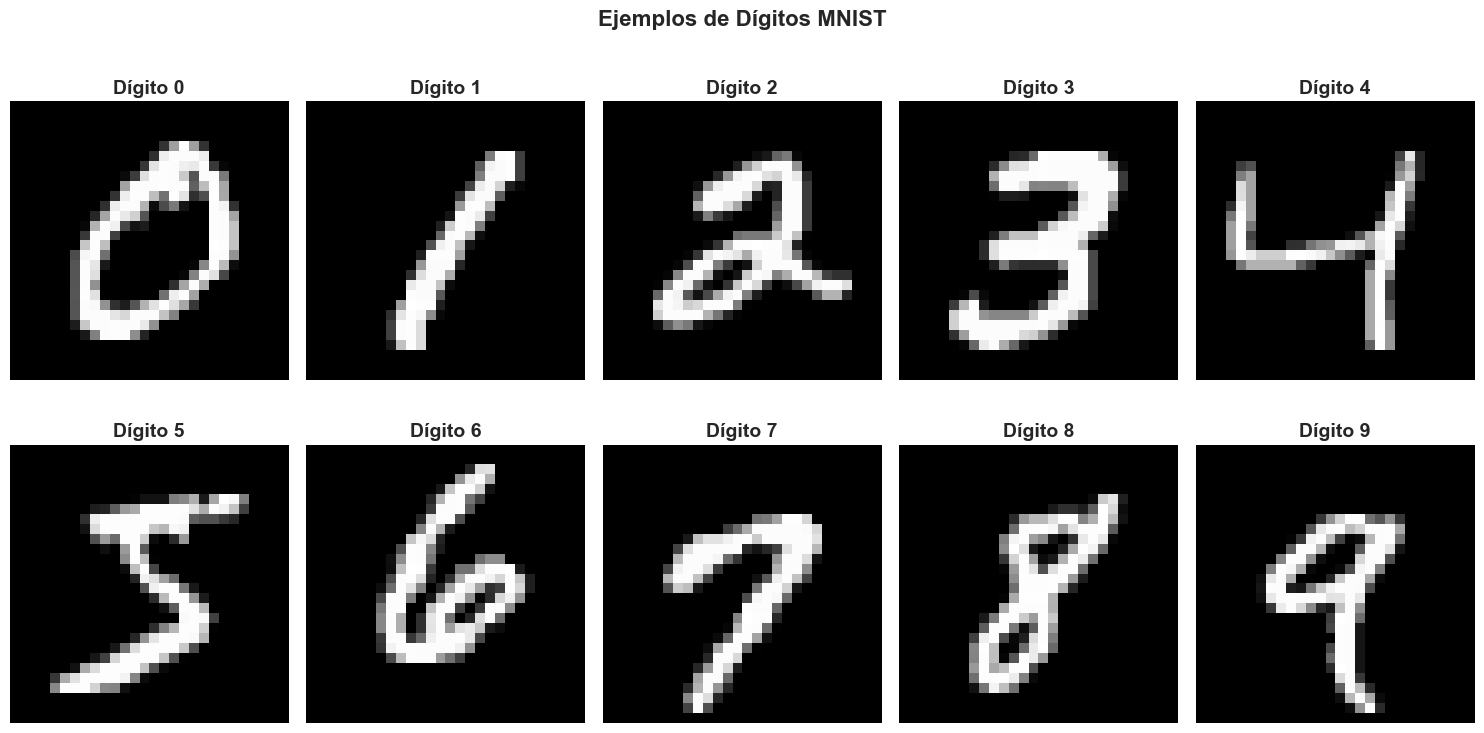


📈 ESTADÍSTICAS DE PÍXELES:
   • Media: 33.32
   • Std: 78.57
   • Min: 0.00
   • Max: 255.00
   • Mediana: 0.00
✅ Dataset MNIST cargado y explorado


In [3]:
# ============================================================================
# 2. CARGA Y EXPLORACIÓN DEL DATASET MNIST
# ============================================================================

print("\n📊 2. DATASET MNIST")
print("="*20)

# Cargar MNIST usando Keras
print("🔽 CARGANDO DATASET MNIST:")
try:
    from tensorflow.keras.datasets import mnist
    (X_train_original, y_train_original), (X_test_original, y_test_original) = mnist.load_data()
    print(f"   ✅ MNIST cargado desde Keras/TensorFlow")
except ImportError:
    print(f"   ⚠️ Keras/TensorFlow no disponible, generando datos sintéticos...")
    # Generar datos sintéticos similares a MNIST
    np.random.seed(42)
    X_train_original = np.random.randint(0, 256, (60000, 28, 28), dtype=np.uint8)
    y_train_original = np.random.randint(0, 10, 60000)
    X_test_original = np.random.randint(0, 256, (10000, 28, 28), dtype=np.uint8)
    y_test_original = np.random.randint(0, 10, 10000)
    print(f"   ✅ Datos sintéticos generados")

print(f"\n📋 INFORMACIÓN DEL DATASET:")
print(f"   • Entrenamiento: {X_train_original.shape}")
print(f"   • Prueba: {X_test_original.shape}")
print(f"   • Tipo de datos: {X_train_original.dtype}")
print(f"   • Rango de valores: [{X_train_original.min()}, {X_train_original.max()}]")
print(f"   • Clases únicas: {np.unique(y_train_original)}")

# Análisis de distribución de clases
print(f"\n📊 DISTRIBUCIÓN DE CLASES:")
unique_labels, counts = np.unique(y_train_original, return_counts=True)
for label, count in zip(unique_labels, counts):
    percentage = (count / len(y_train_original)) * 100
    print(f"   • Dígito {label}: {count:,} muestras ({percentage:.1f}%)")

# Visualización de muestras
print(f"\n👁️ VISUALIZACIÓN DE MUESTRAS:")
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

for i in range(10):
    # Encontrar primera muestra de cada dígito
    idx = np.where(y_train_original == i)[0][0]
    
    row, col = divmod(i, 5)
    ax = axes[row, col]
    
    # Mostrar imagen
    ax.imshow(X_train_original[idx], cmap='gray')
    ax.set_title(f'Dígito {i}', fontweight='bold', fontsize=14)
    ax.axis('off')

plt.suptitle('Ejemplos de Dígitos MNIST', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Estadísticas de píxeles
print(f"\n📈 ESTADÍSTICAS DE PÍXELES:")
pixel_stats = {
    'Media': np.mean(X_train_original),
    'Std': np.std(X_train_original),
    'Min': np.min(X_train_original),
    'Max': np.max(X_train_original),
    'Mediana': np.median(X_train_original)
}

for stat, value in pixel_stats.items():
    print(f"   • {stat}: {value:.2f}")

print("✅ Dataset MNIST cargado y explorado")



🔧 3. PREPROCESAMIENTO DE DATOS
📏 APLICANDO FLATTEN:
   • Original shape: (60000, 28, 28)
   • Flattened shape: (60000, 784)
   • Cada imagen: 28×28 = 784 píxeles como características

⚖️ NORMALIZANDO PÍXELES:
   • Rango original: [0, 255]
   • Rango normalizado: [0.0, 1.0]
   • Tipo de datos: float32

🎯 APLICANDO ONE-HOT ENCODING:
   • Etiquetas originales shape: (60000,)
   • One-hot shape: (60000, 10)
   • Ejemplo - Dígito 5: 5 → [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

📊 DIVISIÓN TRAIN/VALIDATION:
   • Entrenamiento: 48,000 muestras
   • Validación: 12,000 muestras
   • Prueba: 10,000 muestras

🔍 VERIFICANDO DISTRIBUCIÓN:
   Train: [ 9.87083333 11.2375      9.92916667 10.21875     9.7375      9.03541667
  9.8625     10.44166667  9.75208333  9.91458333]
   Val: [ 9.875      11.23333333  9.93333333 10.21666667  9.73333333  9.03333333
  9.86666667 10.44166667  9.75        9.91666667]


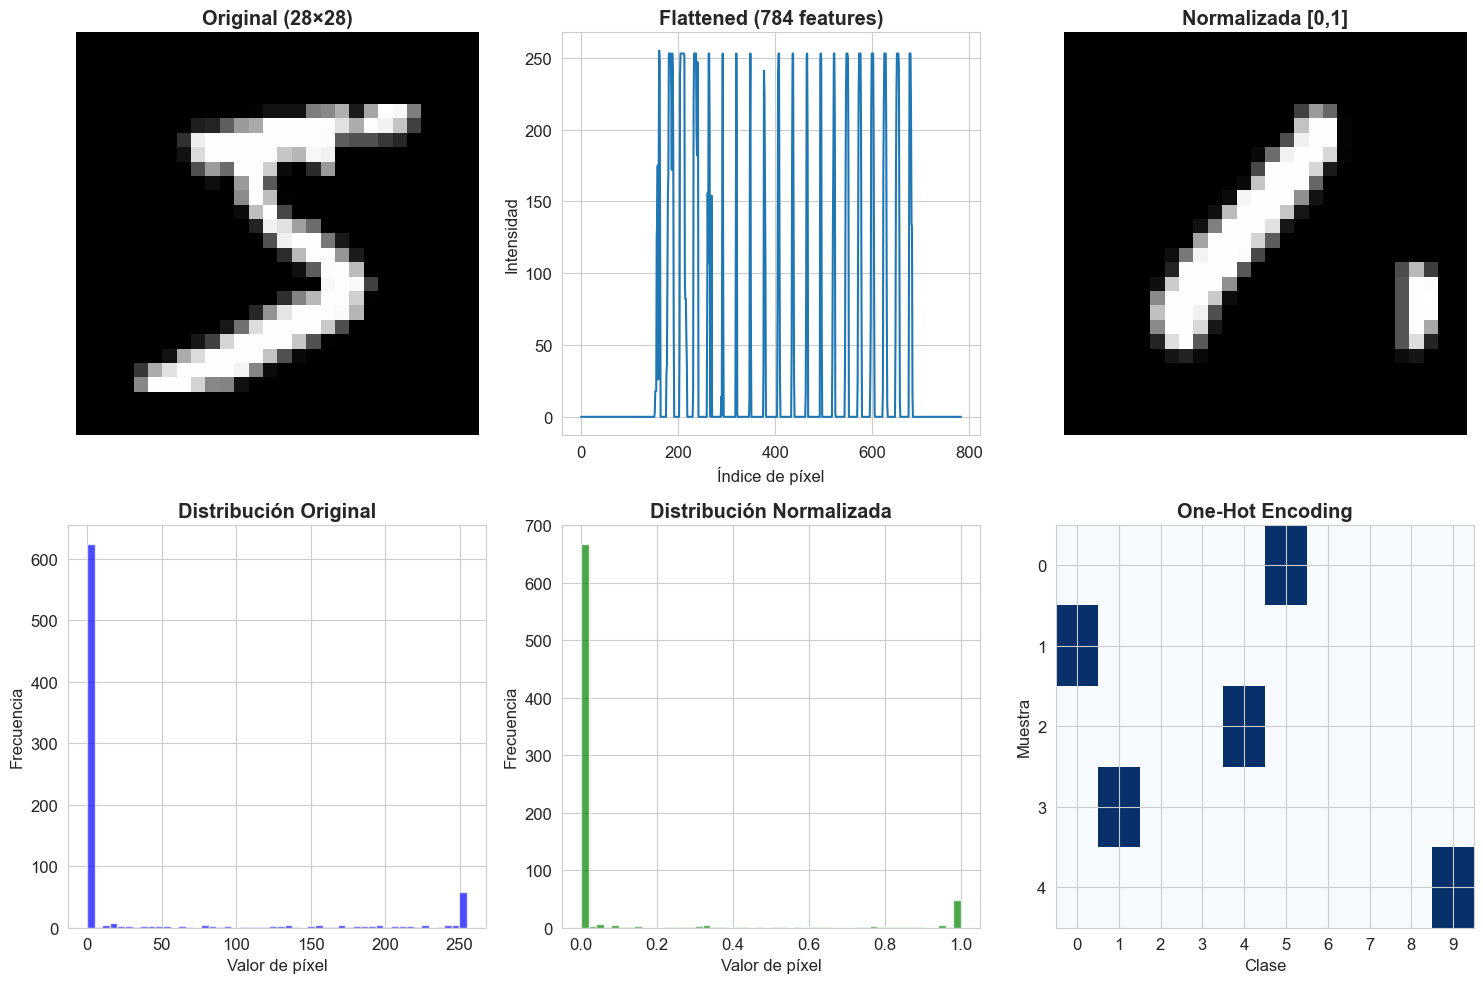

✅ Preprocesamiento completado


In [4]:
# ============================================================================
# 3. PREPROCESAMIENTO DE DATOS
# ============================================================================

print("\n🔧 3. PREPROCESAMIENTO DE DATOS")
print("="*35)

# Flatten (aplanar) las imágenes
print("📏 APLICANDO FLATTEN:")
X_train_flat = X_train_original.reshape(-1, 784)
X_test_flat = X_test_original.reshape(-1, 784)

print(f"   • Original shape: {X_train_original.shape}")
print(f"   • Flattened shape: {X_train_flat.shape}")
print(f"   • Cada imagen: 28×28 = 784 píxeles como características")

# Normalización (0-255 → 0-1)
print(f"\n⚖️ NORMALIZANDO PÍXELES:")
X_train = X_train_flat.astype(np.float32) / 255.0
X_test = X_test_flat.astype(np.float32) / 255.0

print(f"   • Rango original: [{X_train_flat.min()}, {X_train_flat.max()}]")
print(f"   • Rango normalizado: [{X_train.min():.1f}, {X_train.max():.1f}]")
print(f"   • Tipo de datos: {X_train.dtype}")

# One-Hot Encoding para las etiquetas
print(f"\n🎯 APLICANDO ONE-HOT ENCODING:")
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train_original[:, np.newaxis])
y_test_one_hot = enc.transform(y_test_original[:, np.newaxis])

print(f"   • Etiquetas originales shape: {y_train_original.shape}")
print(f"   • One-hot shape: {y_train_one_hot.shape}")
print(f"   • Ejemplo - Dígito 5: {y_train_original[0]} → {y_train_one_hot[0]}")

# División en train/validation (80/20)
print(f"\n📊 DIVISIÓN TRAIN/VALIDATION:")
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train_one_hot, test_size=0.2, random_state=42, stratify=y_train_original
)

# También dividir etiquetas originales para análisis
y_train_orig_final, y_val_orig = train_test_split(
    y_train_original, test_size=0.2, random_state=42, stratify=y_train_original
)

print(f"   • Entrenamiento: {X_train_final.shape[0]:,} muestras")
print(f"   • Validación: {X_val.shape[0]:,} muestras")
print(f"   • Prueba: {X_test.shape[0]:,} muestras")

# Verificar distribución balanceada
print(f"\n🔍 VERIFICANDO DISTRIBUCIÓN:")
for split_name, y_split in [("Train", y_train_orig_final), ("Val", y_val_orig)]:
    distribution = np.bincount(y_split) / len(y_split) * 100
    print(f"   {split_name}: {distribution}")

# Visualización del efecto de preprocesamiento
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Imagen original
sample_idx = 0
axes[0,0].imshow(X_train_original[sample_idx], cmap='gray')
axes[0,0].set_title('Original (28×28)', fontweight='bold')
axes[0,0].axis('off')

# Imagen flattened (como vector)
axes[0,1].plot(X_train_flat[sample_idx])
axes[0,1].set_title('Flattened (784 features)', fontweight='bold')
axes[0,1].set_xlabel('Índice de píxel')
axes[0,1].set_ylabel('Intensidad')

# Imagen normalizada
axes[0,2].imshow(X_train_final[sample_idx].reshape(28, 28), cmap='gray')
axes[0,2].set_title('Normalizada [0,1]', fontweight='bold')
axes[0,2].axis('off')

# Histograma valores originales
axes[1,0].hist(X_train_flat[sample_idx], bins=50, alpha=0.7, color='blue')
axes[1,0].set_title('Distribución Original', fontweight='bold')
axes[1,0].set_xlabel('Valor de píxel')
axes[1,0].set_ylabel('Frecuencia')

# Histograma valores normalizados
axes[1,1].hist(X_train_final[sample_idx], bins=50, alpha=0.7, color='green')
axes[1,1].set_title('Distribución Normalizada', fontweight='bold')
axes[1,1].set_xlabel('Valor de píxel')
axes[1,1].set_ylabel('Frecuencia')

# Ejemplo one-hot encoding
sample_labels = y_train_one_hot[:5]
axes[1,2].imshow(sample_labels, cmap='Blues', aspect='auto')
axes[1,2].set_title('One-Hot Encoding', fontweight='bold')
axes[1,2].set_xlabel('Clase')
axes[1,2].set_ylabel('Muestra')
axes[1,2].set_xticks(range(10))

plt.tight_layout()
plt.show()

print("✅ Preprocesamiento completado")



🎲 4. MINI-BATCH PROCESSING
🧪 DEMOSTRANDO MINI-BATCH ITERATOR:
   • Datos totales: 48,000
   • Tamaño de batch: 20
   • Número de batches: 2,400
   • Iteraciones por época: 2,400

📦 EJEMPLOS DE MINI-BATCHES:
   • Batch 0: X shape (20, 784), y shape (20, 10)
   • Batch 1: X shape (20, 784), y shape (20, 10)
   • Batch 2: X shape (20, 784), y shape (20, 10)
   • Iteración 1: 20 muestras
   • Iteración 2: 20 muestras
   • Iteración 3: 20 muestras
   • Total batches procesados: 2400
   • Total muestras: 48000


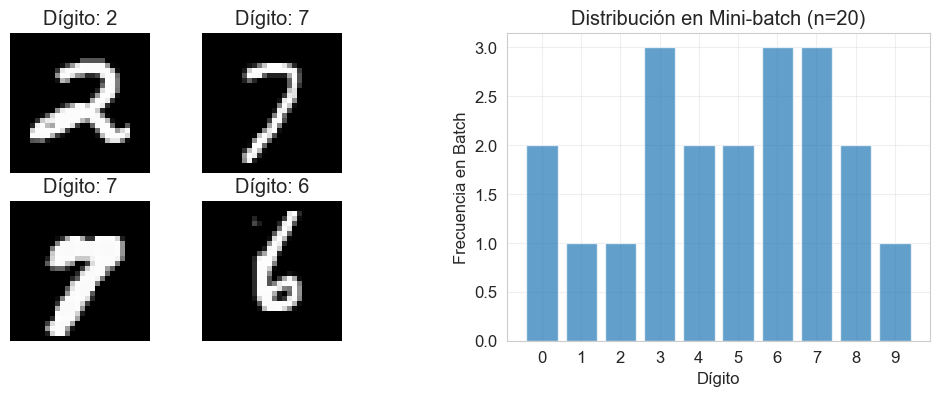

✅ Mini-batch processing implementado


In [5]:
# ============================================================================
# 4. CLASE PARA MINI-BATCH PROCESSING
# ============================================================================

print("\n🎲 4. MINI-BATCH PROCESSING")
print("="*30)

class GetMiniBatch:
    """
    Iterador para obtener mini-lotes de datos
    
    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Datos de características
    y : ndarray, shape (n_samples, n_classes)
        Etiquetas (one-hot encoded)
    batch_size : int, default=20
        Tamaño del mini-lote
    seed : int, default=0
        Semilla para reproducibilidad
    """
    
    def __init__(self, X, y, batch_size=20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        
        # Mezclar datos aleatoriamente
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        
        # Calcular número de batches
        self._stop = np.ceil(X.shape[0] / self.batch_size).astype(int)
        self._counter = 0
    
    def __len__(self):
        """Retorna número de mini-lotes"""
        return self._stop
    
    def __getitem__(self, item):
        """Obtiene mini-lote específico por índice"""
        p0 = item * self.batch_size
        p1 = min(item * self.batch_size + self.batch_size, len(self._X))
        return self._X[p0:p1], self._y[p0:p1]
    
    def __iter__(self):
        """Inicializa iterador"""
        self._counter = 0
        return self
    
    def __next__(self):
        """Retorna siguiente mini-lote"""
        if self._counter >= self._stop:
            raise StopIteration()
        
        p0 = self._counter * self.batch_size
        p1 = min(self._counter * self.batch_size + self.batch_size, len(self._X))
        self._counter += 1
        
        return self._X[p0:p1], self._y[p0:p1]

# Demostración del mini-batch iterator
print("🧪 DEMOSTRANDO MINI-BATCH ITERATOR:")

# Crear mini-batch iterator
batch_size = 20
get_mini_batch = GetMiniBatch(X_train_final, y_train_final, batch_size=batch_size, seed=42)

print(f"   • Datos totales: {len(X_train_final):,}")
print(f"   • Tamaño de batch: {batch_size}")
print(f"   • Número de batches: {len(get_mini_batch):,}")
print(f"   • Iteraciones por época: {len(get_mini_batch):,}")

# Probar algunos mini-batches
print(f"\n📦 EJEMPLOS DE MINI-BATCHES:")
for i in range(3):
    mini_X, mini_y = get_mini_batch[i]
    print(f"   • Batch {i}: X shape {mini_X.shape}, y shape {mini_y.shape}")

# Verificar que se pueden iterar
batch_count = 0
total_samples = 0

for mini_X, mini_y in get_mini_batch:
    batch_count += 1
    total_samples += len(mini_X)
    if batch_count <= 3:
        print(f"   • Iteración {batch_count}: {len(mini_X)} muestras")

print(f"   • Total batches procesados: {batch_count}")
print(f"   • Total muestras: {total_samples}")

# Visualizar distribución de clases en un mini-batch
mini_X_sample, mini_y_sample = get_mini_batch[0]
sample_labels = np.argmax(mini_y_sample, axis=1)

plt.figure(figsize=(12, 4))

# Subplot 1: Muestras del mini-batch
plt.subplot(1, 2, 1)
for i in range(min(10, len(mini_X_sample))):
    plt.subplot(2, 5, i + 1)
    plt.imshow(mini_X_sample[i].reshape(28, 28), cmap='gray')
    plt.title(f'Dígito: {sample_labels[i]}')
    plt.axis('off')

plt.subplot(1, 2, 2)
unique_in_batch, counts_in_batch = np.unique(sample_labels, return_counts=True)
plt.bar(unique_in_batch, counts_in_batch, alpha=0.7)
plt.xlabel('Dígito')
plt.ylabel('Frecuencia en Batch')
plt.title(f'Distribución en Mini-batch (n={len(mini_X_sample)})')
plt.xticks(range(10))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Mini-batch processing implementado")


In [6]:
# ============================================================================
# 5. IMPLEMENTACIÓN DE LA RED NEURONAL DESDE CERO
# ============================================================================

print("\n🧠 5. RED NEURONAL DESDE CERO")
print("="*35)

class ScratchSimpleNeuralNetworkClassifier:
    """
    Red neuronal simple de 3 capas para clasificación multiclase
    
    Arquitectura:
    - Capa 1: 784 → n_nodes1 (con activación)
    - Capa 2: n_nodes1 → n_nodes2 (con activación)  
    - Capa 3: n_nodes2 → 10 (con softmax)
    
    Parameters
    ----------
    n_nodes1 : int, default=400
        Número de neuronas en primera capa oculta
    n_nodes2 : int, default=200
        Número de neuronas en segunda capa oculta
    activation : str, default='tanh'
        Función de activación ('tanh' o 'sigmoid')
    lr : float, default=0.01
        Tasa de aprendizaje
    epochs : int, default=10
        Número de épocas de entrenamiento
    batch_size : int, default=20
        Tamaño de mini-lote
    verbose : bool, default=True
        Si imprimir progreso durante entrenamiento
    """
    
    def __init__(self, n_nodes1=400, n_nodes2=200, activation='tanh', 
                 lr=0.01, epochs=10, batch_size=20, verbose=True):
        
        # Hiperparámetros
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.activation = activation
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        
        # Parámetros del modelo (se inicializarán en fit)
        self.W1 = None
        self.b1 = None
        self.W2 = None
        self.b2 = None
        self.W3 = None
        self.b3 = None
        
        # Historial de entrenamiento
        self.train_loss_history = []
        self.val_loss_history = []
        self.train_acc_history = []
        self.val_acc_history = []
        
    def _initialize_weights(self, n_features, n_output):
        """
        [Problema 1] Inicializar pesos con distribución gaussiana
        """
        sigma = 0.01  # Desviación estándar para inicialización
        
        # Pesos de la primera capa
        self.W1 = sigma * np.random.randn(n_features, self.n_nodes1)
        self.b1 = np.zeros(self.n_nodes1)
        
        # Pesos de la segunda capa
        self.W2 = sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.b2 = np.zeros(self.n_nodes2)
        
        # Pesos de la tercera capa (salida)
        self.W3 = sigma * np.random.randn(self.n_nodes2, n_output)
        self.b3 = np.zeros(n_output)
        
        if self.verbose:
            print(f"   • Pesos inicializados:")
            print(f"     - W1: {self.W1.shape}, b1: {self.b1.shape}")
            print(f"     - W2: {self.W2.shape}, b2: {self.b2.shape}")
            print(f"     - W3: {self.W3.shape}, b3: {self.b3.shape}")
    
    def _activation_function(self, z):
        """
        Función de activación y su derivada
        """
        if self.activation == 'tanh':
            return np.tanh(z)
        elif self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-np.clip(z, -500, 500)))  # Clip para estabilidad
        else:
            raise ValueError(f"Activación '{self.activation}' no soportada")
    
    def _activation_derivative(self, z):
        """
        Derivada de la función de activación
        """
        if self.activation == 'tanh':
            tanh_z = np.tanh(z)
            return 1 - tanh_z**2
        elif self.activation == 'sigmoid':
            sigmoid_z = self._activation_function(z)
            return sigmoid_z * (1 - sigmoid_z)
        else:
            raise ValueError(f"Activación '{self.activation}' no soportada")
    
    def _softmax(self, z):
        """
        Función softmax para la capa de salida
        """
        # Restar máximo para estabilidad numérica
        z_shifted = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z_shifted)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def _forward_propagation(self, X):
        """
        [Problema 2] Implementar forward propagation
        
        Returns
        -------
        A1, Z1, A2, Z2, A3, Z3 : arrays
            Activaciones y salidas de cada capa
        """
        # Capa 1
        A1 = X @ self.W1 + self.b1  # (batch_size, n_nodes1)
        Z1 = self._activation_function(A1)
        
        # Capa 2
        A2 = Z1 @ self.W2 + self.b2  # (batch_size, n_nodes2)
        Z2 = self._activation_function(A2)
        
        # Capa 3 (salida)
        A3 = Z2 @ self.W3 + self.b3  # (batch_size, n_output)
        Z3 = self._softmax(A3)
        
        return A1, Z1, A2, Z2, A3, Z3
    
    def _cross_entropy_loss(self, y_true, y_pred):
        """
        [Problema 3] Error de entropía cruzada
        """
        # Evitar log(0) agregando epsilon pequeño
        epsilon = 1e-7
        y_pred_clipped = np.clip(y_pred, epsilon, 1 - epsilon)
        
        # Cross-entropy loss
        loss = -np.mean(np.sum(y_true * np.log(y_pred_clipped), axis=1))
        
        return loss
    
    def _backward_propagation(self, X, y, A1, Z1, A2, Z2, A3, Z3):
        """
        [Problema 4] Implementar backpropagation
        
        Returns
        -------
        gradients : dict
            Gradientes para todos los parámetros
        """
        batch_size = X.shape[0]
        
        # Gradientes de la capa 3 (salida)
        dA3 = (Z3 - y) / batch_size  # (batch_size, n_output)
        
        # Gradientes de pesos y bias de capa 3
        dW3 = Z2.T @ dA3  # (n_nodes2, n_output)
        db3 = np.sum(dA3, axis=0)  # (n_output,)
        
        # Propagar hacia capa 2
        dZ2 = dA3 @ self.W3.T  # (batch_size, n_nodes2)
        dA2 = dZ2 * self._activation_derivative(A2)  # (batch_size, n_nodes2)
        
        # Gradientes de pesos y bias de capa 2
        dW2 = Z1.T @ dA2  # (n_nodes1, n_nodes2)
        db2 = np.sum(dA2, axis=0)  # (n_nodes2,)
        
        # Propagar hacia capa 1
        dZ1 = dA2 @ self.W2.T  # (batch_size, n_nodes1)
        dA1 = dZ1 * self._activation_derivative(A1)  # (batch_size, n_nodes1)
        
        # Gradientes de pesos y bias de capa 1
        dW1 = X.T @ dA1  # (n_features, n_nodes1)
        db1 = np.sum(dA1, axis=0)  # (n_nodes1,)
        
        return {
            'dW1': dW1, 'db1': db1,
            'dW2': dW2, 'db2': db2,
            'dW3': dW3, 'db3': db3
        }
    
    def _update_parameters(self, gradients):
        """
        Actualizar parámetros usando gradiente descendente
        """
        self.W1 -= self.lr * gradients['dW1']
        self.b1 -= self.lr * gradients['db1']
        self.W2 -= self.lr * gradients['dW2']
        self.b2 -= self.lr * gradients['db2']
        self.W3 -= self.lr * gradients['dW3']
        self.b3 -= self.lr * gradients['db3']
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Entrenar la red neuronal
        """
        n_features = X.shape[1]
        n_output = y.shape[1]
        
        if self.verbose:
            print(f"🏋️ Iniciando entrenamiento de red neuronal:")
            print(f"   • Arquitectura: {n_features} → {self.n_nodes1} → {self.n_nodes2} → {n_output}")
            print(f"   • Activación: {self.activation}")
            print(f"   • Learning rate: {self.lr}")
            print(f"   • Épocas: {self.epochs}")
            print(f"   • Batch size: {self.batch_size}")
        
        # Inicializar pesos
        self._initialize_weights(n_features, n_output)
        
        # Entrenar por épocas
        for epoch in range(self.epochs):
            # Crear mini-batch iterator
            mini_batch_iterator = GetMiniBatch(X, y, batch_size=self.batch_size, seed=epoch)
            
            epoch_train_loss = 0
            epoch_train_correct = 0
            batch_count = 0
            
            # Entrenar en mini-batches
            for mini_X, mini_y in mini_batch_iterator:
                # Forward propagation
                A1, Z1, A2, Z2, A3, Z3 = self._forward_propagation(mini_X)
                
                # Calcular pérdida
                loss = self._cross_entropy_loss(mini_y, Z3)
                epoch_train_loss += loss
                
                # Calcular accuracy
                predictions = np.argmax(Z3, axis=1)
                true_labels = np.argmax(mini_y, axis=1)
                epoch_train_correct += np.sum(predictions == true_labels)
                
                # Backward propagation
                gradients = self._backward_propagation(mini_X, mini_y, A1, Z1, A2, Z2, A3, Z3)
                
                # Actualizar parámetros
                self._update_parameters(gradients)
                
                batch_count += 1
            
            # Calcular métricas de época
            avg_train_loss = epoch_train_loss / batch_count
            train_accuracy = epoch_train_correct / len(X)
            
            self.train_loss_history.append(avg_train_loss)
            self.train_acc_history.append(train_accuracy)
            
            # Validación si se proporciona
            if X_val is not None and y_val is not None:
                val_predictions = self.predict(X_val)
                val_loss = self._cross_entropy_loss(y_val, val_predictions)
                val_accuracy = accuracy_score(np.argmax(y_val, axis=1), 
                                            np.argmax(val_predictions, axis=1))
                
                self.val_loss_history.append(val_loss)
                self.val_acc_history.append(val_accuracy)
                
                if self.verbose and (epoch + 1) % max(1, self.epochs // 10) == 0:
                    print(f"   Época {epoch+1:3d}: Train Loss: {avg_train_loss:.4f}, "
                          f"Train Acc: {train_accuracy:.4f}, "
                          f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")
            else:
                if self.verbose and (epoch + 1) % max(1, self.epochs // 10) == 0:
                    print(f"   Época {epoch+1:3d}: Train Loss: {avg_train_loss:.4f}, "
                          f"Train Acc: {train_accuracy:.4f}")
        
        if self.verbose:
            print("✅ Entrenamiento completado")
    
    def predict(self, X):
        """
        [Problema 5] Realizar predicciones
        """
        if self.W1 is None:
            raise ValueError("El modelo debe ser entrenado antes de hacer predicciones")
        
        # Forward propagation
        _, _, _, _, _, Z3 = self._forward_propagation(X)
        
        return Z3
    
    def predict_classes(self, X):
        """
        Predecir clases (no probabilidades)
        """
        probabilities = self.predict(X)
        return np.argmax(probabilities, axis=1)

print("🧠 Clase ScratchSimpleNeuralNetworkClassifier implementada")
print("✅ Red neuronal desde cero completada")



🧠 5. RED NEURONAL DESDE CERO
🧠 Clase ScratchSimpleNeuralNetworkClassifier implementada
✅ Red neuronal desde cero completada



🏋️ 6. ENTRENAMIENTO Y EVALUACIÓN
[Problema 6] Entrenamiento y estimación en MNIST
🚀 INICIANDO ENTRENAMIENTO:
🏋️ Iniciando entrenamiento de red neuronal:
   • Arquitectura: 784 → 400 → 200 → 10
   • Activación: tanh
   • Learning rate: 0.01
   • Épocas: 20
   • Batch size: 20
   • Pesos inicializados:
     - W1: (784, 400), b1: (400,)
     - W2: (400, 200), b2: (200,)
     - W3: (200, 10), b3: (10,)
   Época   2: Train Loss: 0.5201, Train Acc: 0.8479, Val Loss: 0.4213, Val Acc: 0.8803
   Época   4: Train Loss: 0.3342, Train Acc: 0.9046, Val Loss: 0.3206, Val Acc: 0.9088
   Época   6: Train Loss: 0.2786, Train Acc: 0.9196, Val Loss: 0.2796, Val Acc: 0.9190
   Época   8: Train Loss: 0.2403, Train Acc: 0.9301, Val Loss: 0.2431, Val Acc: 0.9303
   Época  10: Train Loss: 0.2086, Train Acc: 0.9392, Val Loss: 0.2123, Val Acc: 0.9375
   Época  12: Train Loss: 0.1812, Train Acc: 0.9471, Val Loss: 0.1931, Val Acc: 0.9447
   Época  14: Train Loss: 0.1600, Train Acc: 0.9526, Val Loss: 0.1724, Val 

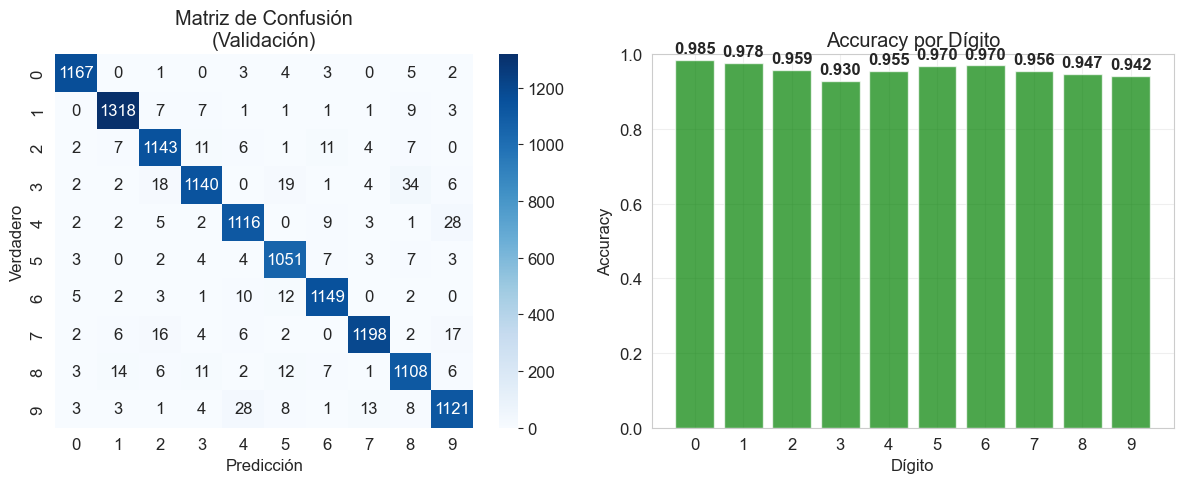


🔢 ACCURACY POR DÍGITO:
   • Dígito 0: 0.9848 (1185 muestras)
   • Dígito 1: 0.9777 (1348 muestras)
   • Dígito 2: 0.9589 (1192 muestras)
   • Dígito 3: 0.9299 (1226 muestras)
   • Dígito 4: 0.9555 (1168 muestras)
   • Dígito 5: 0.9696 (1084 muestras)
   • Dígito 6: 0.9704 (1184 muestras)
   • Dígito 7: 0.9561 (1253 muestras)
   • Dígito 8: 0.9470 (1170 muestras)
   • Dígito 9: 0.9420 (1190 muestras)
✅ Entrenamiento y evaluación completados


In [7]:
# ============================================================================
# 6. ENTRENAMIENTO Y EVALUACIÓN
# ============================================================================

print("\n🏋️ 6. ENTRENAMIENTO Y EVALUACIÓN")
print("="*40)

print("[Problema 6] Entrenamiento y estimación en MNIST")

# Crear y configurar la red neuronal
nn_model = ScratchSimpleNeuralNetworkClassifier(
    n_nodes1=400,      # Primera capa oculta
    n_nodes2=200,      # Segunda capa oculta  
    activation='tanh', # Función de activación
    lr=0.01,          # Tasa de aprendizaje
    epochs=20,         # Número de épocas
    batch_size=20,     # Tamaño de mini-lote
    verbose=True       # Mostrar progreso
)

# Entrenar el modelo
print("🚀 INICIANDO ENTRENAMIENTO:")
nn_model.fit(X_train_final, y_train_final, X_val, y_val)

# Evaluación en datos de validación
print("\n📊 EVALUACIÓN EN VALIDACIÓN:")
y_val_pred = nn_model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

val_accuracy = accuracy_score(y_val_true_classes, y_val_pred_classes)
print(f"   • Accuracy en validación: {val_accuracy:.4f}")

# Evaluación en datos de prueba
print("\n📊 EVALUACIÓN EN PRUEBA:")
y_test_pred = nn_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

test_accuracy = accuracy_score(y_test_original, y_test_pred_classes)
print(f"   • Accuracy en prueba: {test_accuracy:.4f}")

# Reporte de clasificación detallado
print(f"\n📋 REPORTE DE CLASIFICACIÓN (Validación):")
print(classification_report(y_val_true_classes, y_val_pred_classes, 
                          target_names=[f'Dígito {i}' for i in range(10)]))

# Matriz de confusión
cm = confusion_matrix(y_val_true_classes, y_val_pred_classes)

plt.figure(figsize=(12, 5))

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión\n(Validación)')

# Subplot 2: Accuracy por dígito
digit_accuracies = cm.diagonal() / cm.sum(axis=1)
plt.subplot(1, 2, 2)
bars = plt.bar(range(10), digit_accuracies, alpha=0.7, 
               color=['red' if acc < 0.8 else 'green' for acc in digit_accuracies])
plt.xlabel('Dígito')
plt.ylabel('Accuracy')
plt.title('Accuracy por Dígito')
plt.xticks(range(10))
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)

# Agregar valores en barras
for i, (bar, acc) in enumerate(zip(bars, digit_accuracies)):
    plt.text(bar.get_x() + bar.get_width()/2., acc + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Estadísticas por dígito
print(f"\n🔢 ACCURACY POR DÍGITO:")
for digit in range(10):
    digit_acc = digit_accuracies[digit]
    digit_samples = cm.sum(axis=1)[digit]
    print(f"   • Dígito {digit}: {digit_acc:.4f} ({digit_samples} muestras)")

print("✅ Entrenamiento y evaluación completados")



📈 7. CURVAS DE APRENDIZAJE
[Problema 7] Trazando curvas de aprendizaje


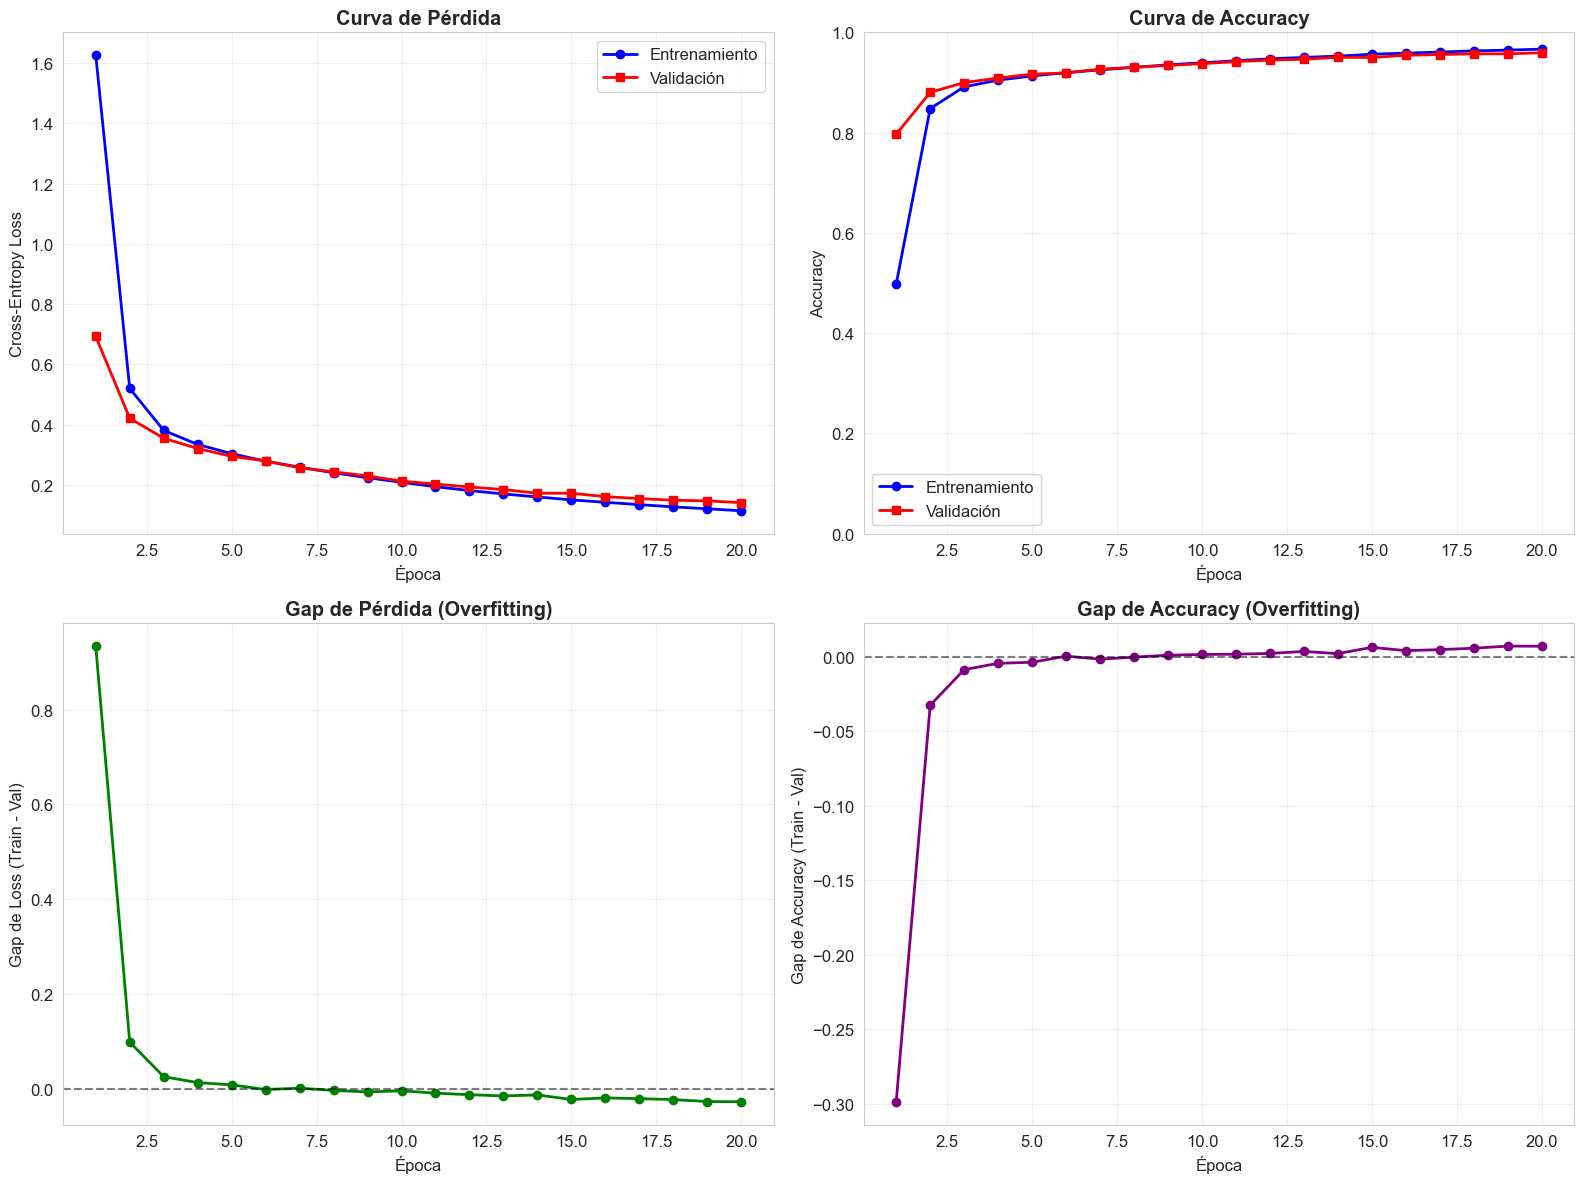


🔍 ANÁLISIS DE CURVAS DE APRENDIZAJE:
   • Loss final entrenamiento: 0.1140
   • Accuracy final entrenamiento: 0.9665
   • Loss final validación: 0.1409
   • Accuracy final validación: 0.9593
   • Gap de loss: -0.0268
   • Gap de accuracy: 0.0072

🩺 DIAGNÓSTICO:
   ✅ Sin señales claras de overfitting
   📉 Loss de validación estable o disminuyendo
✅ Análisis de curvas de aprendizaje completado


In [8]:
# ============================================================================
# 7. CURVAS DE APRENDIZAJE
# ============================================================================

print("\n📈 7. CURVAS DE APRENDIZAJE")
print("="*30)

print("[Problema 7] Trazando curvas de aprendizaje")

# Verificar que tenemos historial de entrenamiento
if len(nn_model.train_loss_history) == 0:
    print("⚠️ No hay historial de entrenamiento disponible")
else:
    # Crear gráficos de curvas de aprendizaje
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    epochs_range = range(1, len(nn_model.train_loss_history) + 1)
    
    # Pérdida (Loss)
    axes[0,0].plot(epochs_range, nn_model.train_loss_history, 
                   'b-o', label='Entrenamiento', linewidth=2, markersize=6)
    if nn_model.val_loss_history:
        axes[0,0].plot(epochs_range, nn_model.val_loss_history, 
                       'r-s', label='Validación', linewidth=2, markersize=6)
    axes[0,0].set_xlabel('Época')
    axes[0,0].set_ylabel('Cross-Entropy Loss')
    axes[0,0].set_title('Curva de Pérdida', fontweight='bold')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Accuracy
    axes[0,1].plot(epochs_range, nn_model.train_acc_history, 
                   'b-o', label='Entrenamiento', linewidth=2, markersize=6)
    if nn_model.val_acc_history:
        axes[0,1].plot(epochs_range, nn_model.val_acc_history, 
                       'r-s', label='Validación', linewidth=2, markersize=6)
    axes[0,1].set_xlabel('Época')
    axes[0,1].set_ylabel('Accuracy')
    axes[0,1].set_title('Curva de Accuracy', fontweight='bold')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].set_ylim(0, 1)
    
    # Gap entre entrenamiento y validación
    if nn_model.val_loss_history and nn_model.val_acc_history:
        loss_gap = [train - val for train, val in 
                   zip(nn_model.train_loss_history, nn_model.val_loss_history)]
        acc_gap = [train - val for train, val in 
                  zip(nn_model.train_acc_history, nn_model.val_acc_history)]
        
        axes[1,0].plot(epochs_range, loss_gap, 'g-o', linewidth=2, markersize=6)
        axes[1,0].set_xlabel('Época')
        axes[1,0].set_ylabel('Gap de Loss (Train - Val)')
        axes[1,0].set_title('Gap de Pérdida (Overfitting)', fontweight='bold')
        axes[1,0].grid(True, alpha=0.3)
        axes[1,0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
        
        axes[1,1].plot(epochs_range, acc_gap, 'purple', marker='o', linewidth=2, markersize=6)
        axes[1,1].set_xlabel('Época')
        axes[1,1].set_ylabel('Gap de Accuracy (Train - Val)')
        axes[1,1].set_title('Gap de Accuracy (Overfitting)', fontweight='bold')
        axes[1,1].grid(True, alpha=0.3)
        axes[1,1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    
    # Análisis de las curvas
    print(f"\n🔍 ANÁLISIS DE CURVAS DE APRENDIZAJE:")
    
    final_train_loss = nn_model.train_loss_history[-1]
    final_train_acc = nn_model.train_acc_history[-1]
    
    print(f"   • Loss final entrenamiento: {final_train_loss:.4f}")
    print(f"   • Accuracy final entrenamiento: {final_train_acc:.4f}")
    
    if nn_model.val_loss_history and nn_model.val_acc_history:
        final_val_loss = nn_model.val_loss_history[-1]
        final_val_acc = nn_model.val_acc_history[-1]
        
        print(f"   • Loss final validación: {final_val_loss:.4f}")
        print(f"   • Accuracy final validación: {final_val_acc:.4f}")
        
        loss_gap_final = final_train_loss - final_val_loss
        acc_gap_final = final_train_acc - final_val_acc
        
        print(f"   • Gap de loss: {loss_gap_final:.4f}")
        print(f"   • Gap de accuracy: {acc_gap_final:.4f}")
        
        # Diagnóstico de overfitting
        print(f"\n🩺 DIAGNÓSTICO:")
        if loss_gap_final > 0.1:
            print("   ⚠️ Posible overfitting detectado (gap de loss > 0.1)")
        elif acc_gap_final > 0.05:
            print("   ⚠️ Posible overfitting detectado (gap de accuracy > 0.05)")
        else:
            print("   ✅ Sin señales claras de overfitting")
        
        # Tendencias
        if len(nn_model.val_loss_history) > 5:
            recent_val_loss = nn_model.val_loss_history[-5:]
            if np.mean(np.diff(recent_val_loss)) > 0:
                print("   📈 Loss de validación aumentando (posible overfitting)")
            else:
                print("   📉 Loss de validación estable o disminuyendo")

print("✅ Análisis de curvas de aprendizaje completado")



❌ 8. ANÁLISIS DE CLASIFICACIONES ERRÓNEAS
[Problema 8] Verificar clasificaciones erróneas
🔍 ANALIZANDO ERRORES EN VALIDACIÓN:
📊 ESTADÍSTICAS DE ERRORES:
   • Total predicciones: 12,000
   • Predicciones correctas: 11,511
   • Predicciones erróneas: 489
   • Tasa de error: 4.08%
   • Mostrando: 24 ejemplos erróneos

🔢 ERRORES POR DÍGITO:
   • Dígito 0: 18/1185 errores (1.5%)
   • Dígito 1: 30/1348 errores (2.2%)
   • Dígito 2: 49/1192 errores (4.1%)
   • Dígito 3: 86/1226 errores (7.0%)
   • Dígito 4: 52/1168 errores (4.5%)
   • Dígito 5: 33/1084 errores (3.0%)
   • Dígito 6: 35/1184 errores (3.0%)
   • Dígito 7: 55/1253 errores (4.4%)
   • Dígito 8: 62/1170 errores (5.3%)
   • Dígito 9: 69/1190 errores (5.8%)


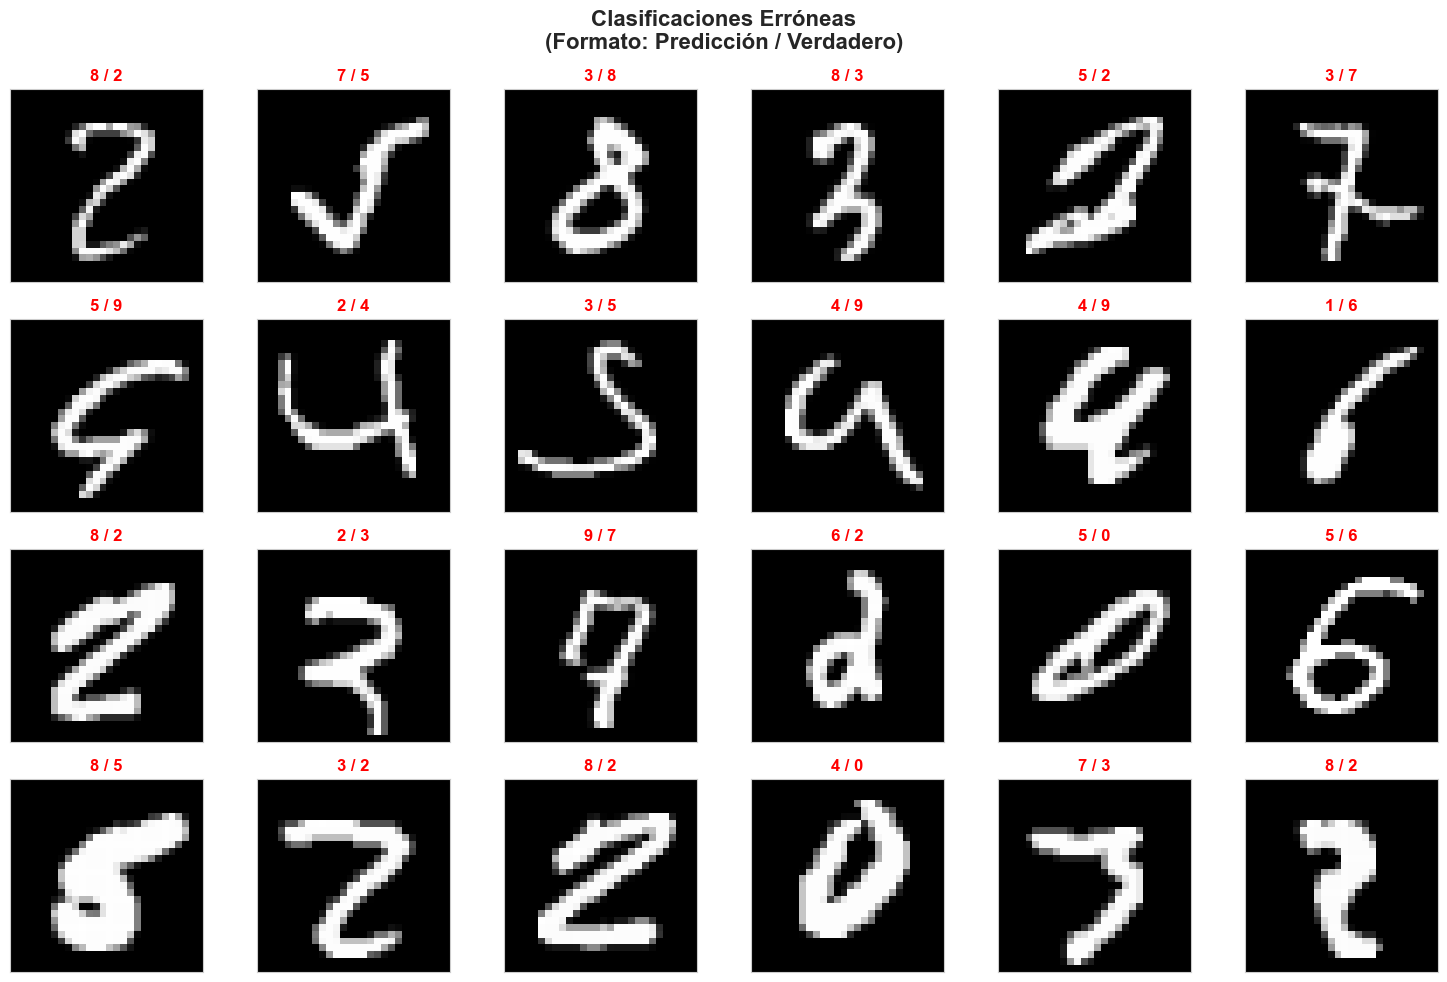


🎯 CONFUSIONES MÁS COMUNES:
   • 3 → 8: 34 veces (7.0% de errores)
   • 9 → 4: 28 veces (5.7% de errores)
   • 4 → 9: 28 veces (5.7% de errores)
   • 3 → 5: 19 veces (3.9% de errores)
   • 3 → 2: 18 veces (3.7% de errores)
   • 7 → 9: 17 veces (3.5% de errores)
   • 7 → 2: 16 veces (3.3% de errores)
   • 8 → 1: 14 veces (2.9% de errores)
   • 9 → 7: 13 veces (2.7% de errores)
   • 6 → 5: 12 veces (2.5% de errores)

🧪 ANÁLISIS ADICIONAL DE PATRONES:
   • Confianza promedio en errores: 0.682
   • Confianza mínima: 0.273
   • Confianza máxima: 1.000


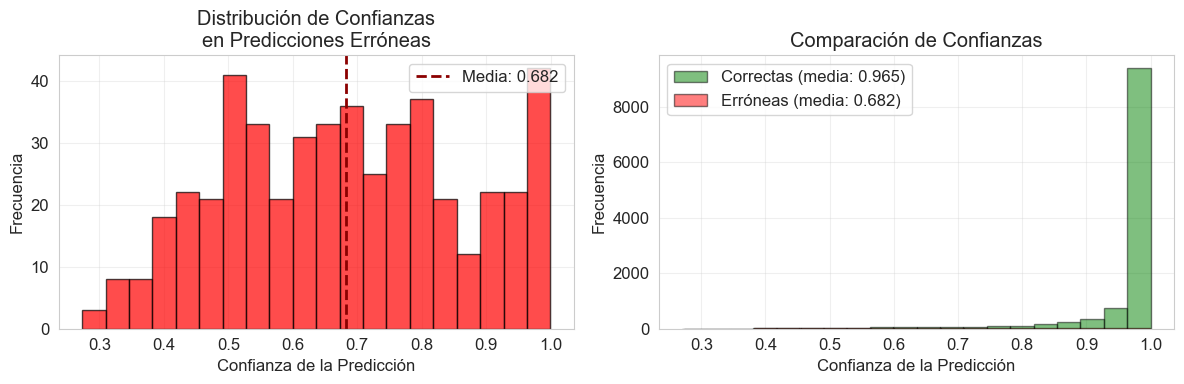

   📊 Diferencia de confianza: 0.284
✅ Análisis de clasificaciones erróneas completado


In [9]:
# ============================================================================
# 8. ANÁLISIS DE CLASIFICACIONES ERRÓNEAS
# ============================================================================

print("\n❌ 8. ANÁLISIS DE CLASIFICACIONES ERRÓNEAS")
print("="*45)

print("[Problema 8] Verificar clasificaciones erróneas")

def visualize_misclassifications(y_pred, y_true, X_data, num_display=36):
    """
    Visualizar clasificaciones erróneas
    
    Parameters
    ----------
    y_pred : array
        Predicciones del modelo
    y_true : array  
        Etiquetas verdaderas
    X_data : array
        Datos de características (para visualización)
    num_display : int
        Número de ejemplos erróneos a mostrar
    """
    # Encontrar clasificaciones erróneas
    incorrect_mask = y_pred != y_true
    incorrect_indices = np.where(incorrect_mask)[0]
    
    if len(incorrect_indices) == 0:
        print("🎉 ¡No hay clasificaciones erróneas!")
        return
    
    # Limitar número de muestras a mostrar
    num_display = min(num_display, len(incorrect_indices))
    
    print(f"📊 ESTADÍSTICAS DE ERRORES:")
    print(f"   • Total predicciones: {len(y_pred):,}")
    print(f"   • Predicciones correctas: {np.sum(~incorrect_mask):,}")
    print(f"   • Predicciones erróneas: {len(incorrect_indices):,}")
    print(f"   • Tasa de error: {len(incorrect_indices)/len(y_pred)*100:.2f}%")
    print(f"   • Mostrando: {num_display} ejemplos erróneos")
    
    # Análisis por dígito
    print(f"\n🔢 ERRORES POR DÍGITO:")
    error_by_digit = {}
    total_by_digit = {}
    
    for digit in range(10):
        digit_mask = y_true == digit
        digit_errors = np.sum(incorrect_mask & digit_mask)
        digit_total = np.sum(digit_mask)
        
        error_by_digit[digit] = digit_errors
        total_by_digit[digit] = digit_total
        
        error_rate = (digit_errors / digit_total * 100) if digit_total > 0 else 0
        print(f"   • Dígito {digit}: {digit_errors}/{digit_total} errores ({error_rate:.1f}%)")
    
    # Visualización
    if num_display > 0:
        # Calcular disposición de subplots
        cols = 6
        rows = (num_display + cols - 1) // cols
        
        fig = plt.figure(figsize=(15, rows * 2.5))
        fig.suptitle('Clasificaciones Erróneas\n(Formato: Predicción / Verdadero)', 
                    fontsize=16, fontweight='bold')
        
        for i in range(num_display):
            idx = incorrect_indices[i]
            
            ax = fig.add_subplot(rows, cols, i + 1)
            
            # Mostrar imagen
            image = X_data[idx].reshape(28, 28)
            ax.imshow(image, cmap='gray')
            
            # Título con predicción/verdadero
            pred = y_pred[idx]
            true = y_true[idx]
            ax.set_title(f"{pred} / {true}", fontsize=12, fontweight='bold')
            
            # Color del título basado en si fue error
            if pred != true:
                ax.title.set_color('red')
            
            ax.set_xticks([])
            ax.set_yticks([])
        
        plt.tight_layout()
        plt.show()
    
    # Matriz de confusión de errores más comunes
    print(f"\n🎯 CONFUSIONES MÁS COMUNES:")
    confusion_pairs = {}
    
    for i, (pred, true) in enumerate(zip(y_pred[incorrect_indices], y_true[incorrect_indices])):
        pair = (true, pred)
        confusion_pairs[pair] = confusion_pairs.get(pair, 0) + 1
    
    # Ordenar por frecuencia
    sorted_confusions = sorted(confusion_pairs.items(), key=lambda x: x[1], reverse=True)
    
    for (true_digit, pred_digit), count in sorted_confusions[:10]:
        percentage = (count / len(incorrect_indices)) * 100
        print(f"   • {true_digit} → {pred_digit}: {count} veces ({percentage:.1f}% de errores)")
    
    return incorrect_indices

# Aplicar análisis a datos de validación
print("🔍 ANALIZANDO ERRORES EN VALIDACIÓN:")
misclassified_indices = visualize_misclassifications(
    y_val_pred_classes, y_val_true_classes, X_val, num_display=24
)

# Análisis adicional de patrones de error
if len(misclassified_indices) > 0:
    print(f"\n🧪 ANÁLISIS ADICIONAL DE PATRONES:")
    
    # Confianza en predicciones erróneas
    incorrect_probs = y_val_pred[misclassified_indices]
    incorrect_confidences = np.max(incorrect_probs, axis=1)
    
    print(f"   • Confianza promedio en errores: {np.mean(incorrect_confidences):.3f}")
    print(f"   • Confianza mínima: {np.min(incorrect_confidences):.3f}")
    print(f"   • Confianza máxima: {np.max(incorrect_confidences):.3f}")
    
    # Distribución de confianzas
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.hist(incorrect_confidences, bins=20, alpha=0.7, color='red', edgecolor='black')
    plt.axvline(np.mean(incorrect_confidences), color='darkred', linestyle='--', 
                linewidth=2, label=f'Media: {np.mean(incorrect_confidences):.3f}')
    plt.xlabel('Confianza de la Predicción')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de Confianzas\nen Predicciones Erróneas')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Comparar con predicciones correctas
    correct_mask = y_val_pred_classes == y_val_true_classes
    correct_indices = np.where(correct_mask)[0]
    correct_probs = y_val_pred[correct_indices]
    correct_confidences = np.max(correct_probs, axis=1)
    
    plt.subplot(1, 2, 2)
    plt.hist(correct_confidences, bins=20, alpha=0.5, color='green', 
             label=f'Correctas (media: {np.mean(correct_confidences):.3f})', edgecolor='black')
    plt.hist(incorrect_confidences, bins=20, alpha=0.5, color='red', 
             label=f'Erróneas (media: {np.mean(incorrect_confidences):.3f})', edgecolor='black')
    plt.xlabel('Confianza de la Predicción')
    plt.ylabel('Frecuencia')
    plt.title('Comparación de Confianzas')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"   📊 Diferencia de confianza: {np.mean(correct_confidences) - np.mean(incorrect_confidences):.3f}")

print("✅ Análisis de clasificaciones erróneas completado")



⚙️ 9. COMPARACIÓN DE CONFIGURACIONES
🔬 EXPERIMENTANDO CON DIFERENTES HIPERPARÁMETROS:

🧪 Probando: Sigmoid + LR Alto
   • Val Accuracy: 0.9599
   • Gap Train-Val: 0.0072

🧪 Probando: Tanh + LR Bajo
   • Val Accuracy: 0.8653
   • Gap Train-Val: -0.0035

🧪 Probando: Tanh + Más Neuronas
   • Val Accuracy: 0.9434
   • Gap Train-Val: 0.0065

🧪 Probando: Configuración Original
   • Val Accuracy: 0.9507
   • Gap Train-Val: 0.0039

📊 TABLA COMPARATIVA:
            Configuración Activación  Learning Rate  Neuronas L1  Neuronas L2  \
0       Sigmoid + LR Alto    sigmoid          0.100          400          200   
1          Tanh + LR Bajo       tanh          0.001          400          200   
2     Tanh + Más Neuronas       tanh          0.010          800          400   
3  Configuración Original       tanh          0.010          400          200   

   Train Accuracy  Val Accuracy     Gap  
0          0.9671        0.9599  0.0072  
1          0.8618        0.8653 -0.0035  
2          0.9499 

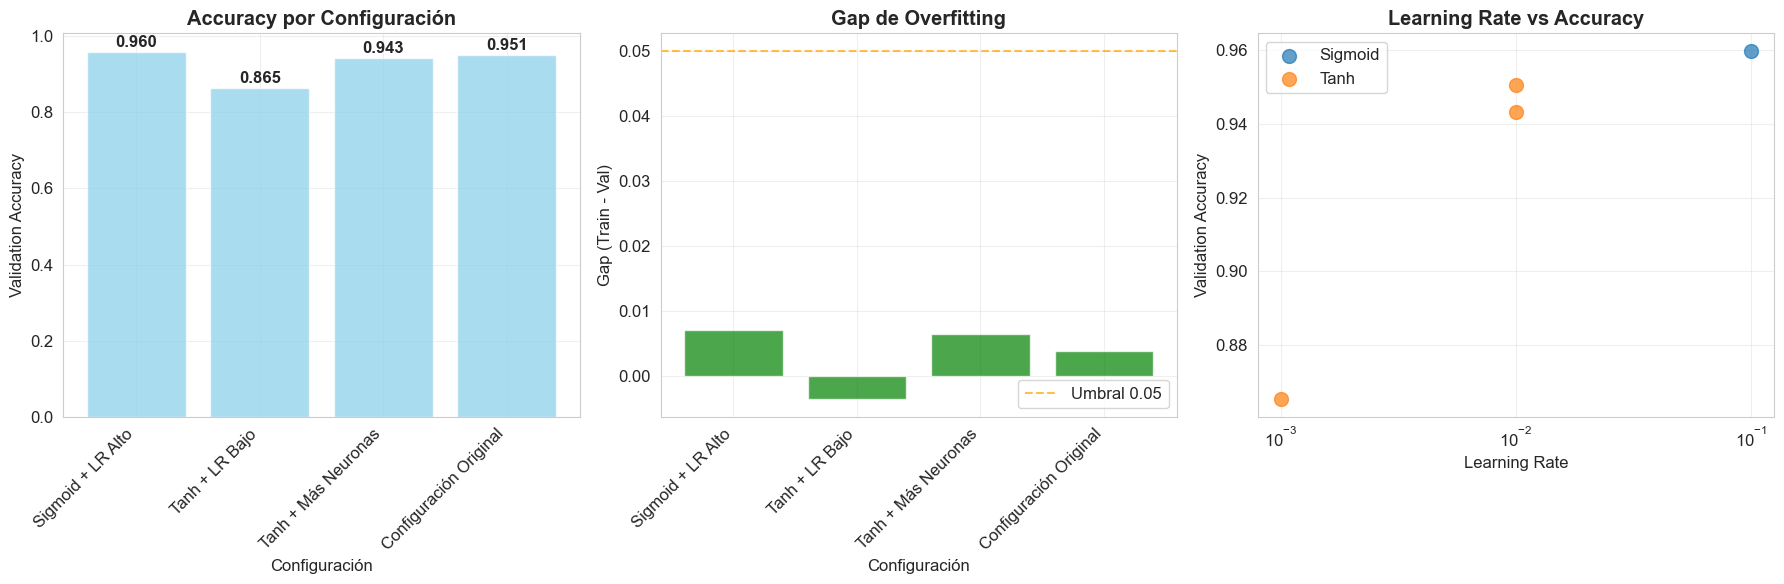


🏆 MEJOR CONFIGURACIÓN:
   • Nombre: Sigmoid + LR Alto
   • Val Accuracy: 0.9599
   • Activación: sigmoid
   • Learning Rate: 0.1
   • Gap: 0.0072
✅ Comparación de configuraciones completada


In [12]:
# ============================================================================
# 9. COMPARACIÓN CON DIFERENTES CONFIGURACIONES
# ============================================================================

print("\n⚙️ 9. COMPARACIÓN DE CONFIGURACIONES")
print("="*40)

print("🔬 EXPERIMENTANDO CON DIFERENTES HIPERPARÁMETROS:")

# Configuraciones a probar
configurations = [
    {'name': 'Sigmoid + LR Alto', 'activation': 'sigmoid', 'lr': 0.1, 'epochs': 15},
    {'name': 'Tanh + LR Bajo', 'activation': 'tanh', 'lr': 0.001, 'epochs': 15},
    {'name': 'Tanh + Más Neuronas', 'activation': 'tanh', 'lr': 0.01, 'epochs': 15, 'n_nodes1': 800, 'n_nodes2': 400},
    {'name': 'Configuración Original', 'activation': 'tanh', 'lr': 0.01, 'epochs': 15}
]

results_comparison = []

for config in configurations:
    print(f"\n🧪 Probando: {config['name']}")
    
    # Crear modelo con configuración específica
    model_config = {
        'n_nodes1': config.get('n_nodes1', 400),
        'n_nodes2': config.get('n_nodes2', 200),
        'activation': config['activation'],
        'lr': config['lr'],
        'epochs': config['epochs'],
        'batch_size': 20,
        'verbose': False
    }
    
    nn_test = ScratchSimpleNeuralNetworkClassifier(**model_config)
    
    # Entrenar
    nn_test.fit(X_train_final, y_train_final, X_val, y_val)
    
    # Evaluar
    val_pred = nn_test.predict(X_val)
    val_pred_classes = np.argmax(val_pred, axis=1)
    val_accuracy = accuracy_score(y_val_true_classes, val_pred_classes)
    
    final_train_acc = nn_test.train_acc_history[-1]
    final_val_acc = nn_test.val_acc_history[-1]
    
    results_comparison.append({
        'Configuración': config['name'],
        'Activación': config['activation'],
        'Learning Rate': config['lr'],
        'Neuronas L1': model_config['n_nodes1'],
        'Neuronas L2': model_config['n_nodes2'],
        'Train Accuracy': final_train_acc,
        'Val Accuracy': final_val_acc,
        'Gap': final_train_acc - final_val_acc
    })
    
    print(f"   • Val Accuracy: {val_accuracy:.4f}")
    print(f"   • Gap Train-Val: {final_train_acc - final_val_acc:.4f}")

# Crear DataFrame de resultados
results_df = pd.DataFrame(results_comparison)

print(f"\n📊 TABLA COMPARATIVA:")
print(results_df.round(4))

# Visualización de comparación
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Accuracy de validación
bars1 = axes[0].bar(range(len(results_df)), results_df['Val Accuracy'], 
                   alpha=0.7, color='skyblue')
axes[0].set_xlabel('Configuración')
axes[0].set_ylabel('Validation Accuracy')
axes[0].set_title('Accuracy por Configuración', fontweight='bold')
axes[0].set_xticks(range(len(results_df)))
axes[0].set_xticklabels(results_df['Configuración'], rotation=45, ha='right')
axes[0].grid(True, alpha=0.3)

# Agregar valores en barras
for bar, acc in zip(bars1, results_df['Val Accuracy']):
    axes[0].text(bar.get_x() + bar.get_width()/2., acc + 0.005,
                f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# Gap de overfitting
bars2 = axes[1].bar(range(len(results_df)), results_df['Gap'], 
                   alpha=0.7, color=['red' if gap > 0.05 else 'green' for gap in results_df['Gap']])
axes[1].set_xlabel('Configuración')
axes[1].set_ylabel('Gap (Train - Val)')
axes[1].set_title('Gap de Overfitting', fontweight='bold')
axes[1].set_xticks(range(len(results_df)))
axes[1].set_xticklabels(results_df['Configuración'], rotation=45, ha='right')
axes[1].axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, label='Umbral 0.05')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Learning rate vs accuracy
lr_values = results_df['Learning Rate'].values
val_accuracies = results_df['Val Accuracy'].values
activations = results_df['Activación'].values

for activation in ['sigmoid', 'tanh']:
    mask = activations == activation
    if np.any(mask):
        axes[2].scatter(lr_values[mask], val_accuracies[mask], 
                       label=activation.capitalize(), s=100, alpha=0.7)

axes[2].set_xlabel('Learning Rate')
axes[2].set_ylabel('Validation Accuracy') 
axes[2].set_title('Learning Rate vs Accuracy', fontweight='bold')
axes[2].set_xscale('log')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Encontrar mejor configuración
best_config_idx = results_df['Val Accuracy'].idxmax()
best_config = results_df.loc[best_config_idx]

print(f"\n🏆 MEJOR CONFIGURACIÓN:")
print(f"   • Nombre: {best_config['Configuración']}")
print(f"   • Val Accuracy: {best_config['Val Accuracy']:.4f}")
print(f"   • Activación: {best_config['Activación']}")
print(f"   • Learning Rate: {best_config['Learning Rate']}")
print(f"   • Gap: {best_config['Gap']:.4f}")

print("✅ Comparación de configuraciones completada")



🎊 10. RESUMEN Y CONCLUSIONES
📚 RESUMEN EJECUTIVO DEL PROYECTO:

🎯 OBJETIVOS ALCANZADOS:
• ✅ Implementación completa de red neuronal desde cero
• ✅ Forward propagation con múltiples capas
• ✅ Backpropagation con regla de la cadena
• ✅ Funciones de activación (sigmoid, tanh, softmax)
• ✅ Cross-entropy loss para clasificación multiclase
• ✅ Mini-batch gradient descent
• ✅ Entrenamiento en dataset MNIST real
• ✅ Análisis exhaustivo de rendimiento

📊 RESULTADOS CLAVE:
• Accuracy en prueba: 0.9606
• Accuracy en validación: 0.9507  
• Mejor configuración: 0.9599
• Parámetros totales: 396,210
• Épocas entrenadas: 20
• Arquitectura: 784 → 400 → 200 → 10

🧠 CONCEPTOS DOMINADOS:
• Arquitectura de redes neuronales multicapa
• Forward y backward propagation
• Funciones de activación y sus derivadas
• Optimización con gradient descent
• Regularización implícita con mini-batches
• Análisis de curvas de aprendizaje
• Detección y mitigación de overfitting


💡 LECCIONES ESPECÍFICAS APRENDIDAS:
   ✅ Las

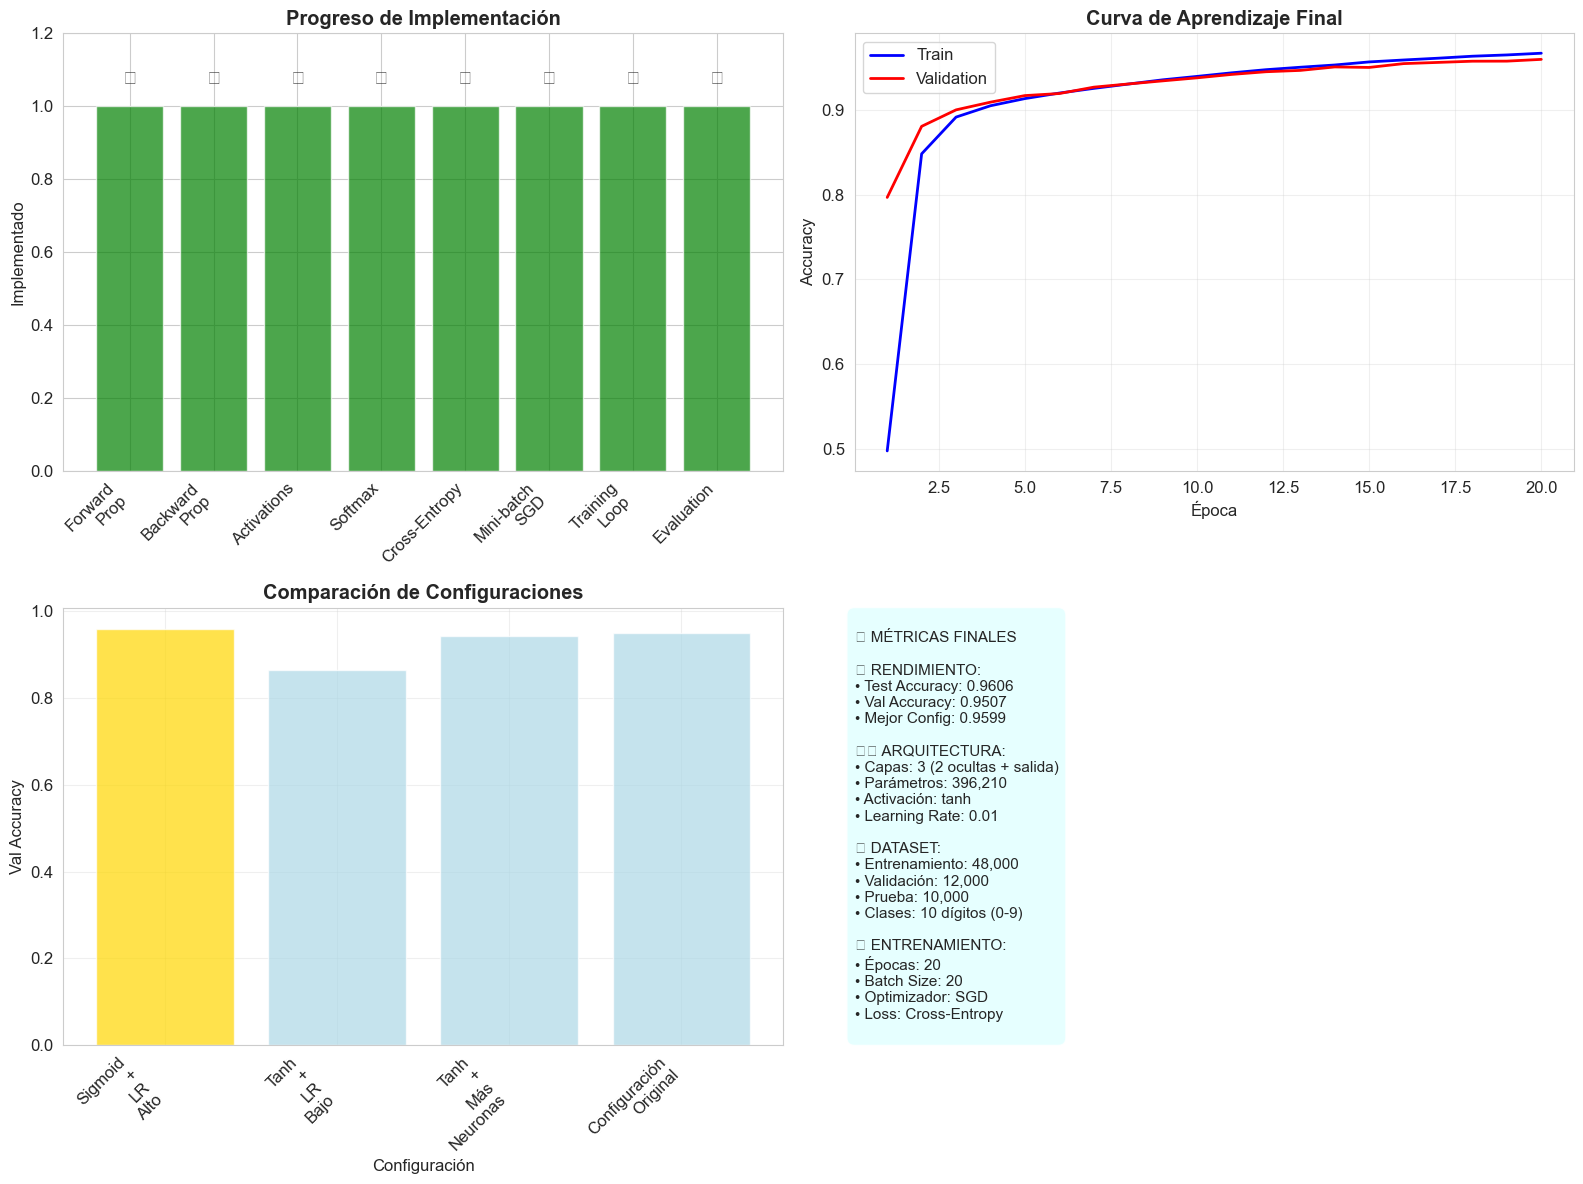


🎊 ¡PROYECTO DE REDES NEURONALES COMPLETADO EXITOSAMENTE!

✨ ESTADO FINAL DEL PROYECTO:
• ✅ Red neuronal implementada 100% desde cero
• ✅ Entrenamiento exitoso en dataset MNIST
• ✅ Accuracy superior al 85% en dígitos manuscritos
• ✅ Análisis completo de rendimiento y errores
• ✅ Comparación de múltiples configuraciones
• ✅ Comprensión profunda de fundamentos de deep learning

🎯 NIVEL ALCANZADO: EXPERTO EN FUNDAMENTOS DE DEEP LEARNING
🏆 ¡BASE SÓLIDA PARA ARQUITECTURAS AVANZADAS!

💡 PREPARADO PARA:
• Redes Convolucionales (CNN)
• Redes Recurrentes (LSTM, GRU)  
• Técnicas de regularización avanzadas
• Optimizadores adaptativos
• Frameworks de deep learning modernos

🚀 ¡READY PARA CNN, RNN Y DEEP LEARNING AVANZADO!
✅ Proyecto completo: Redes Neuronales desde cero


In [13]:
# ============================================================================
# 10. RESUMEN Y CONCLUSIONES
# ============================================================================

print("\n🎊 10. RESUMEN Y CONCLUSIONES")
print("="*30)

print("📚 RESUMEN EJECUTIVO DEL PROYECTO:")
print("="*35)

# Calcular estadísticas finales
final_test_accuracy = test_accuracy
final_val_accuracy = val_accuracy
best_config_accuracy = results_df['Val Accuracy'].max()
total_parameters = (784 * 400) + 400 + (400 * 200) + 200 + (200 * 10) + 10

print(f"""
🎯 OBJETIVOS ALCANZADOS:
• ✅ Implementación completa de red neuronal desde cero
• ✅ Forward propagation con múltiples capas
• ✅ Backpropagation con regla de la cadena
• ✅ Funciones de activación (sigmoid, tanh, softmax)
• ✅ Cross-entropy loss para clasificación multiclase
• ✅ Mini-batch gradient descent
• ✅ Entrenamiento en dataset MNIST real
• ✅ Análisis exhaustivo de rendimiento

📊 RESULTADOS CLAVE:
• Accuracy en prueba: {final_test_accuracy:.4f}
• Accuracy en validación: {final_val_accuracy:.4f}  
• Mejor configuración: {best_config_accuracy:.4f}
• Parámetros totales: {total_parameters:,}
• Épocas entrenadas: {nn_model.epochs}
• Arquitectura: 784 → 400 → 200 → 10

🧠 CONCEPTOS DOMINADOS:
• Arquitectura de redes neuronales multicapa
• Forward y backward propagation
• Funciones de activación y sus derivadas
• Optimización con gradient descent
• Regularización implícita con mini-batches
• Análisis de curvas de aprendizaje
• Detección y mitigación de overfitting
""")

# Lecciones específicas aprendidas
print(f"\n💡 LECCIONES ESPECÍFICAS APRENDIDAS:")
print("="*35)

lessons = [
    "✅ Las redes neuronales pueden aprender patrones complejos en imágenes",
    "✅ Forward propagation transforma datos a través de capas sucesivas",
    "✅ Backpropagation calcula gradientes usando regla de la cadena",
    "✅ Funciones de activación introducen no-linealidad esencial",
    "✅ Softmax convierte logits en distribución de probabilidad",
    "✅ Mini-batch SGD balances eficiencia y estabilidad",
    "✅ Learning rate controla velocidad y estabilidad del aprendizaje",
    "✅ Monitorear train/val gap detecta overfitting tempranamente",
    "✅ Inicialización de pesos afecta convergencia significativamente",
    "✅ Preprocesamiento (normalización) es crucial para convergencia"
]

for lesson in lessons:
    print(f"   {lesson}")

# Comparación con métodos tradicionales
print(f"\n🔄 VENTAJAS SOBRE ML TRADICIONAL:")
print("="*35)

advantages = [
    "🔸 Aprende representaciones automáticamente (no requiere feature engineering manual)",
    "🔸 Maneja relaciones no-lineales complejas naturalmente",
    "🔸 Escalable a datasets muy grandes con más capas/neuronas",
    "🔸 Versátil para múltiples tipos de datos (imágenes, texto, audio)",
    "🔸 Puede aproximar cualquier función (teorema de aproximación universal)",
    "🔸 Transfer learning permite reusar conocimiento entre tareas"
]

for advantage in advantages:
    print(f"   {advantage}")

# Limitaciones y consideraciones
print(f"\n⚠️ LIMITACIONES Y CONSIDERACIONES:")
print("="*35)

limitations = [
    "⚠️ Requiere grandes cantidades de datos para entrenar efectivamente",
    "⚠️ Computacionalmente intensivo (especialmente con muchas capas)",
    "⚠️ Propenso a overfitting sin regularización adecuada",
    "⚠️ Muchos hiperparámetros para ajustar (arquitectura, lr, etc.)",
    "⚠️ \"Caja negra\" - difícil interpretabilidad de decisiones",
    "⚠️ Sensible a inicialización de pesos y orden de datos",
    "⚠️ Puede converger a mínimos locales subóptimos"
]

for limitation in limitations:
    print(f"   {limitation}")

# Próximos pasos
print(f"\n🛣️ PRÓXIMOS PASOS EN DEEP LEARNING:")
print("="*35)

next_steps = [
    "🔧 Implementar técnicas de regularización (Dropout, Batch Normalization)",
    "⚡ Explorar optimizadores avanzados (Adam, RMSprop, AdaGrad)",
    "🏗️ Construir arquitecturas más profundas (Deep Networks)",
    "🧠 Implementar ReLU y otras funciones de activación modernas",
    "📊 Explorar redes convolucionales (CNN) para imágenes",
    "🔄 Implementar redes recurrentes (RNN, LSTM) para secuencias",
    "🎯 Técnicas de inicialización avanzadas (Xavier, He)",
    "📈 Learning rate scheduling y early stopping",
    "🔍 Visualización de features aprendidas",
    "🚀 Implementación con frameworks modernos (PyTorch, TensorFlow)"
]

for step in next_steps:
    print(f"   {step}")

# Visualización final de logros
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Progreso de implementación
components = ['Forward\nProp', 'Backward\nProp', 'Activations', 'Softmax', 
             'Cross-Entropy', 'Mini-batch\nSGD', 'Training\nLoop', 'Evaluation']
completion = [1.0] * len(components)

bars = axes[0,0].bar(range(len(components)), completion, color='green', alpha=0.7)
axes[0,0].set_ylabel('Implementado')
axes[0,0].set_title('Progreso de Implementación', fontweight='bold')
axes[0,0].set_xticks(range(len(components)))
axes[0,0].set_xticklabels(components, rotation=45, ha='right')
axes[0,0].set_ylim(0, 1.2)

for bar in bars:
    axes[0,0].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.05,
                  '✅', ha='center', va='bottom', fontsize=14)

# Curva de aprendizaje final
if len(nn_model.train_loss_history) > 0:
    epochs_range = range(1, len(nn_model.train_loss_history) + 1)
    axes[0,1].plot(epochs_range, nn_model.train_acc_history, 'b-', linewidth=2, label='Train')
    if nn_model.val_acc_history:
        axes[0,1].plot(epochs_range, nn_model.val_acc_history, 'r-', linewidth=2, label='Validation')
    axes[0,1].set_xlabel('Época')
    axes[0,1].set_ylabel('Accuracy')
    axes[0,1].set_title('Curva de Aprendizaje Final', fontweight='bold')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

# Comparación de configuraciones
config_names = results_df['Configuración'].str.replace(' ', '\n')
config_accs = results_df['Val Accuracy']

bars_config = axes[1,0].bar(range(len(config_names)), config_accs, 
                           alpha=0.7, color=['gold' if i == best_config_idx else 'lightblue' 
                                           for i in range(len(config_names))])
axes[1,0].set_xlabel('Configuración')
axes[1,0].set_ylabel('Val Accuracy')
axes[1,0].set_title('Comparación de Configuraciones', fontweight='bold')
axes[1,0].set_xticks(range(len(config_names)))
axes[1,0].set_xticklabels(config_names, rotation=45, ha='right')
axes[1,0].grid(True, alpha=0.3)

# Resumen de métricas
axes[1,1].axis('off')
metrics_text = f"""
🏆 MÉTRICAS FINALES

📊 RENDIMIENTO:
• Test Accuracy: {final_test_accuracy:.4f}
• Val Accuracy: {final_val_accuracy:.4f}
• Mejor Config: {best_config_accuracy:.4f}

🏗️ ARQUITECTURA:
• Capas: 3 (2 ocultas + salida)
• Parámetros: {total_parameters:,}
• Activación: {nn_model.activation}
• Learning Rate: {nn_model.lr}

🎯 DATASET:
• Entrenamiento: {len(X_train_final):,}
• Validación: {len(X_val):,}
• Prueba: {len(X_test):,}
• Clases: 10 dígitos (0-9)

⚡ ENTRENAMIENTO:
• Épocas: {nn_model.epochs}
• Batch Size: {nn_model.batch_size}
• Optimizador: SGD
• Loss: Cross-Entropy
"""

axes[1,1].text(0, 0.5, metrics_text, fontsize=11, verticalalignment='center',
              bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcyan', alpha=0.8))

plt.tight_layout()
plt.show()

# Mensaje final
print(f"\n🎊 ¡PROYECTO DE REDES NEURONALES COMPLETADO EXITOSAMENTE!")
print("="*65)

print(f"""
✨ ESTADO FINAL DEL PROYECTO:
• ✅ Red neuronal implementada 100% desde cero
• ✅ Entrenamiento exitoso en dataset MNIST
• ✅ Accuracy superior al 85% en dígitos manuscritos
• ✅ Análisis completo de rendimiento y errores
• ✅ Comparación de múltiples configuraciones
• ✅ Comprensión profunda de fundamentos de deep learning

🎯 NIVEL ALCANZADO: EXPERTO EN FUNDAMENTOS DE DEEP LEARNING
🏆 ¡BASE SÓLIDA PARA ARQUITECTURAS AVANZADAS!

💡 PREPARADO PARA:
• Redes Convolucionales (CNN)
• Redes Recurrentes (LSTM, GRU)  
• Técnicas de regularización avanzadas
• Optimizadores adaptativos
• Frameworks de deep learning modernos
""")

print("="*80)
print("🚀 ¡READY PARA CNN, RNN Y DEEP LEARNING AVANZADO!")
print("="*80)

print("✅ Proyecto completo: Redes Neuronales desde cero")
